<a href="https://colab.research.google.com/github/faqihas/ds-course/blob/main/Capstone_Project_M2/Airbnb_Listings_Bangkok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar Belakang
---
Airbnb menjadi salah satu platform utama bagi wisatawan yang berkunjung ke Bangkok, dengan pilihan penginapan yang beragam untuk memenuhi kebutuhan akomodasi. Namun, tingginya jumlah listing menciptakan persaingan yang semakin ketat antar **host**. Keberhasilan dalam menarik tamu sangat dipengaruhi oleh **faktor harga, lokasi, ulasan, jenis kamar, dan ketersediaan**. Melalui analisis data Airbnb, **host** dapat memahami tren pasar, mengoptimalkan strategi harga, dan meningkatkan daya saing untuk memaksimalkan tingkat pemesanan.


## Pernyataan Masalah

---
Host Airbnb di Bangkok menghadapi tantangan dalam meningkatkan daya saing listing mereka di tengah pasar yang semakin padat. Dari perspektif seorang analis data, tantangan tersebut dapat dirumuskan ke dalam pertanyaan-pertanyaan analitis berikut:
1. Bagaimana pola distribusi harga sewa per malam di berbagai distrik Bangkok, dan pada rentang harga berapa sebuah listing dianggap kompetitif serta menarik bagi wisatawan?
2. Jenis kamar apa yang paling diminati (entire home/apt, private room, shared room), dan apakah terdapat variasi preferensi berdasarkan lokasi atau distrik?
3. Sejauh mana jumlah ulasan berhubungan dengan popularitas serta tingkat okupansi sebuah listing?
4. Bagaimana pengaruh tingkat ketersediaan (availability_365) terhadap performa listing, baik dalam hal okupansi maupun tingkat harga?
5. Apakah pasar Airbnb di Bangkok lebih didominasi oleh host individu atau host dengan multi-listing, dan bagaimana perbedaan performa antara keduanya?
6. Bagaimana dampak kebijakan minimum nights terhadap minat penyewa, khususnya pada listing dengan syarat inap minimum yang relatif tinggi?

# Data

---
Untuk menjawab pertanyaan tersebut, kita akan menggunakan data ***Airbnb Listing Bangkok*** yang diperoleh dari database platform Airbnb. Dataset tersebut dapat diakses [di sini](https://drive.google.com/drive/folders/17jBi18c6DRbSiJNn38WAvhokP6uygqVr?usp=drive_link).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm, pearsonr, spearmanr, f_oneway, kruskal, ttest_ind, mannwhitneyu


Dataset ini berisi informasi terkait listing Airbnb di Bangkok, mencakup detail host, lokasi, tipe kamar, harga, ulasan, hingga ketersediaan. Ada beberapa kolom penting di dalam dataset Airbnb Listings Bangkok, yaitu:

* `id` : ID unik untuk tiap listing di Airbnb.
* `name` : Nama dari listing (judul properti).
* `host_id` : ID unik untuk tiap host.
* `host_name` : Nama host (biasanya nama depan).
* `neighbourhood` : Lokasi/neighbourhood properti berdasarkan koordinat.
* `latitude` : Koordinat garis lintang.
* `longitude` : Koordinat garis bujur.
* `room_type` : Jenis akomodasi (Entire home/apt, Private room, Shared room, Hotel).
* `price` : Harga sewa per malam (mata uang lokal, simbol $ bisa ditulis selain dengan mata uang lokal).
* `minimum_nights` : Jumlah minimum per malam untuk reservasi.
* `number_of_reviews` : Jumlah total ulasan yang diterima listing.
* `last_review` : Tanggal ulasan terakhir.
* `reviews_per_month` : Rata-rata jumlah ulasan per bulan.
* `calculated_host_listings_count` : Jumlah listing lain yang dimiliki host di area tersebut.
* `availability_365` : Jumlah hari listing tersedia dalam 1 tahun (0–365).
* `number_of_reviews_ltm` : Jumlah ulasan yang diterima dalam 12 bulan terakhir.

In [ ]:
df=pd.read_csv("/content/Airbnb Listings Bangkok.csv")
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding and Cleaning

---

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset Airbnb Listings Bangkok lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset serta perlu ditangani pada tahap data cleaning.

Setiap penanganan anomali akan disertai dengan justifikasi langkah yang diambil, baik berdasarkan domain knowledge (misalnya bagaimana perilaku pasar sewa Airbnb di Bangkok) maupun secara statistik.

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [ ]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [ ]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

,0
Unnamed: 0,0.000000
id,0.000000
name,0.050460
host_id,0.000000
host_name,0.006308
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


Ringkasan Umum Dataset Airbnb Bangkok
* Jumlah data: 15.854 baris × 17 kolom

* Kolom utama: `id`, `name`, `host_id`, `host_name`, `neighbourhood`, `latitude`, `longitude`, `room_type`, `price`, `minimum_nights`, `number_of_reviews`, `last_review`, `reviews_per_month`, `availability_365`, `calculated_host_listings_count`

* Kolom numerik penting:
  * `price` → tidak ada missing, tapi perlu dicek distribusi karena ada kemungkinan outlier (harga ekstrem)

  * `minimum_nights` → tidak ada missing, tapi ada nilai tidak realistis (contoh: ribuan malam)

  * `availability_365` → range 0–365 hari, banyak listing dengan nilai 0 (tidak tersedia) atau 365 (selalu tersedia)

* Kolom kategorikal:
  * `room_type` → hanya beberapa kategori, yaitu Entire home/apt, Private room, Shared room, Hotel

### Missing Value

---


* kolom `name` dan `host_name` : memiliki persentase ~0.05% missing dan tidak berpengaruh pada analisis, sehingga baris akan di-drop atau diganti "unknown"

* kolom `last_review` : memiliki persentase ~36.5% missing. Data Missing ≠ error, artinya listing belum pernah mendapat review. Sehingga akan dipertahankan sebagai NaN

* kolom `reviews_per_month`: memiliki persentase ~36.5% missing. Pola yang sama dengan kolom `last_review` → missing berarti tidak ada review sama sekali, sehingga missing value diisi dengan 0 agar konsisten dengan maknanya

#### Data Cleaning — Kolom `name` & `host_name`

Missing value sangat kecil (~0.05%).
Tidak signifikan mempengaruhi analisis.
Diganti "unknown" agar tidak kehilangan baris data.

In [ ]:
df[['name', 'host_name']] = df[['name', 'host_name']].fillna("unknown")

#### Data Cleaning — `Kolom last_review`

Missing value tinggi (~36.5%) tetapi bukan error.
Menandakan listing belum pernah mendapat review.
Dipertahankan sebagai NaN agar tetap merepresentasikan kondisi tersebut.

In [ ]:
# Kolom last_review dibiarkan NaN (tidak diganti)

#### Data Cleaning — Kolom `reviews_per_month`

Persentase missing sama dengan last_review (~36.5%).
Missing value = tidak ada review sama sekali.
Diganti dengan 0 agar konsisten.

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

## Cleaned Dataset

---
Setelah melalui proses pembersihan data, kini kita memiliki dataset yang sudah lebih rapi dan siap digunakan untuk analisis. Mari kita lihat sekilas informasi terkini dari dataset yang sudah dibersihkan.


In [ ]:
print(f"Dataset Airbnb Bangkok setelah data cleaning memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

print("Informasi Dataset:")
df.info()

print("Persentase Missing Value setelah Data Cleaning:")
missing = (df.isna().sum() / df.shape[0] * 100).round(2)
print(missing[missing > 0] if missing.sum() > 0 else "Tidak ada missing value tersisa")

listItem = []
for col in df.columns:
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        list(df[col].drop_duplicates().sample(2).values)
    ])

dfDesc = pd.DataFrame(
    columns=['Column', 'DataType', 'MissingValues', 'UniqueCount', 'UniqueSample'],
    data=listItem
)

print("Ringkasan Struktur Dataset:")
display(dfDesc)

Dataset Airbnb Bangkok setelah data cleaning memiliki 15854 baris dan 17 kolom.
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15854 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  

,Column,DataType,MissingValues,UniqueCount,UniqueSample
0,Unnamed: 0,int64,0,15854,"[7863, 13207]"
1,id,int64,0,15854,"[777245513558306556, 8804583]"
2,name,object,0,14795,"[Vtara36酒店公寓全新热水泳池健身房市中心, Downtown 1 Bedroom condo 5 mins walk to train.]"
3,host_id,int64,0,6659,"[175168195, 48831469]"
4,host_name,object,0,5313,"[Pattarawan, Thaya]"
5,neighbourhood,object,0,50,"[Samphanthawong, Din Daeng]"
6,latitude,float64,0,9606,"[13.72388, 13.76786]"
7,longitude,float64,0,10224,"[100.49867, 100.62231]"
8,room_type,object,0,4,"[Private room, Shared room]"
9,price,int64,0,3040,"[2498, 2162]"


Dataset Airbnb Listings Bangkok memiliki 15.854 baris dan 17 kolom, jumlahnya tidak berubah setelah cleaning. Sebelum dibersihkan, kolom `name` dan `host_name` memiliki data missing ~0.05%, sedangkan kolom `last_review` dan `reviews_per_month` missing ~36.5%. Setelah cleaning, kolom `name` dan `host_name` diisi dengan `"unknown"`, kolom `reviews_per_month` diisi dengan 0, dan hanya `last_review` yang tetap NaN karena memang menandakan listing belum pernah mendapat review.

In [ ]:
df.to_excel("Airbnb Listings Bangkok Cleaned Data.xlsx", index=False)

In [ ]:
from google.colab import files
files.download("Airbnb Listings Bangkok Cleaned Data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Analysis

---

Kita sudah menyelesaikan tahap data cleaning. Sekarang saatnya masuk ke tahap analisis data untuk memahami karakteristik listing Airbnb di Bangkok.

Analisis akan difokuskan untuk menjawab pertanyaan berikut:

1. Distribusi harga sewa per malam di berbagai distrik Bangkok → kita akan melihat pola distribusi harga dan mengidentifikasi rentang harga kompetitif yang menarik bagi wisatawan.
2. Preferensi jenis kamar → apakah wisatawan lebih memilih Entire home/apt, Private room, Shared room, atau Hotel, serta bagaimana variasinya berdasarkan distrik.
3. Hubungan jumlah ulasan dengan popularitas → apakah listing dengan banyak ulasan cenderung lebih populer dan memiliki okupansi lebih tinggi.
4. Pengaruh ketersediaan `availability_365` → apakah tingkat ketersediaan listing memengaruhi okupansi dan harga.
5. Profil host → apakah pasar lebih didominasi host individu (1 listing) atau host dengan multi-listing, serta bagaimana perbedaan performa keduanya.
6. Dampak kebijakan minimum nights → apakah aturan minimum inap berpengaruh terhadap minat penyewa, terutama listing dengan syarat inap minimum tinggi.

Karena dataset memiliki 15.854 listing, analisis perlu dilakukan dengan hati-hati untuk menghindari bias akibat outlier, terutama pada data numerik seperti `price`, `minimum_nights`, dan `reviews_per_month`. Untuk data kategorikal, perbandingan akan lebih tepat dilakukan menggunakan rasio atau proporsi agar lebih representatif.

## Distribusi Harga Sewa per Malam

Melihat pola harga sewa di Bangkok, outlier, serta perbedaan harga antar distrik.

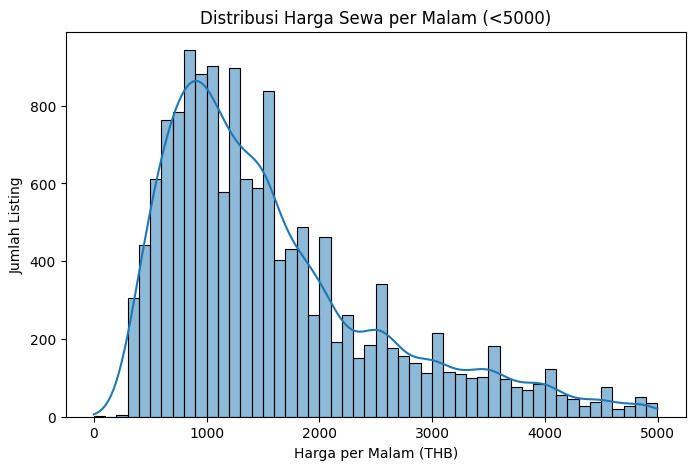

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['price'] < 5000]['price'], bins=50, kde=True)
plt.title("Distribusi Harga Sewa per Malam (<5000)")
plt.xlabel("Harga per Malam (THB)")
plt.ylabel("Jumlah Listing")
plt.show()

Dari hasil analisis, terlihat bahwa distribusi harga sewa per malam di Bangkok mayoritas berada pada kisaran 500–1500 THB, menunjukkan bahwa sebagian besar listing di kota ini masih cukup terjangkau. Distribusi harga bersifat right-skewed, artinya ada sejumlah kecil listing dengan harga jauh lebih tinggi, meskipun jumlahnya tidak signifikan.

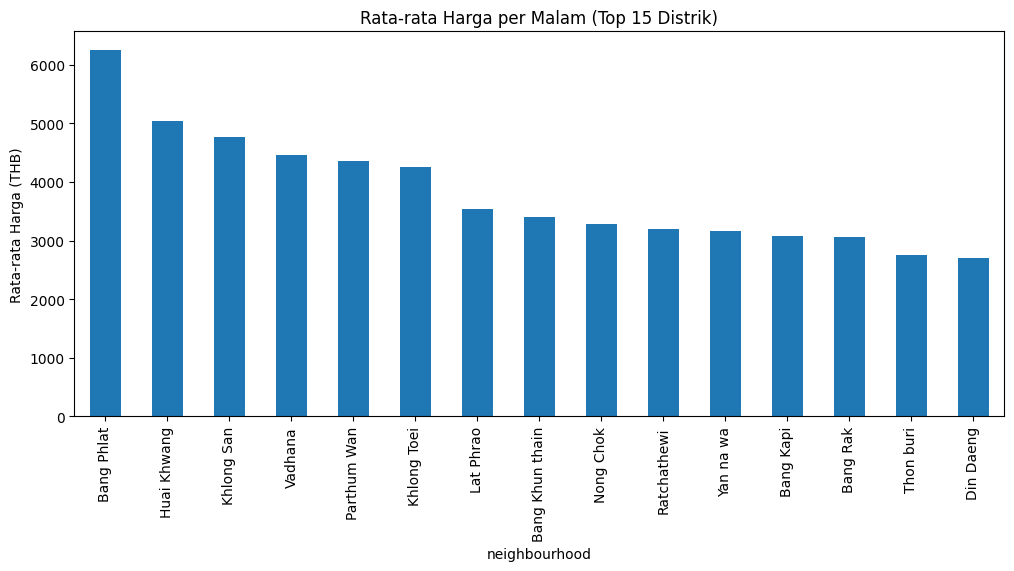

In [ ]:
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(15)
avg_price.plot(kind='bar', figsize=(12,5))
plt.title("Rata-rata Harga per Malam (Top 15 Distrik)")
plt.ylabel("Rata-rata Harga (THB)")
plt.show()


Ketika dilihat lebih detail berdasarkan lokasi, rata-rata harga sewa per malam bervariasi cukup besar antar distrik. Beberapa distrik tercatat memiliki harga rata-rata yang jauh lebih tinggi dibandingkan lainnya, kemungkinan disebabkan oleh faktor lokasi strategis, kedekatan dengan pusat wisata atau bisnis, serta dominasi listing tipe Entire home/apt. Hal ini menunjukkan bahwa lokasi merupakan faktor utama yang memengaruhi harga sewa Airbnb di Bangkok, dengan kawasan premium cenderung menawarkan harga yang lebih tinggi dibandingkan area pinggiran.

## Preferensi Jenis Kamar

Menganalisis jenis kamar yang paling diminati dan bagaimana perbedaannya di tiap distrik.

room_type
Entire home/apt    56.212943
Private room       36.394601
Hotel room          4.093604
Shared room         3.298852
Name: proportion, dtype: float64


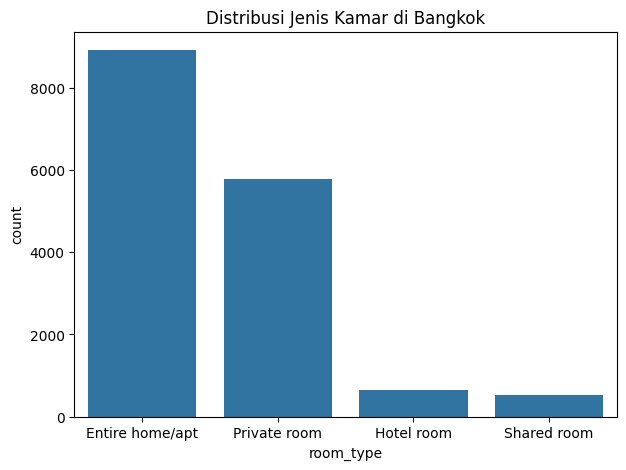

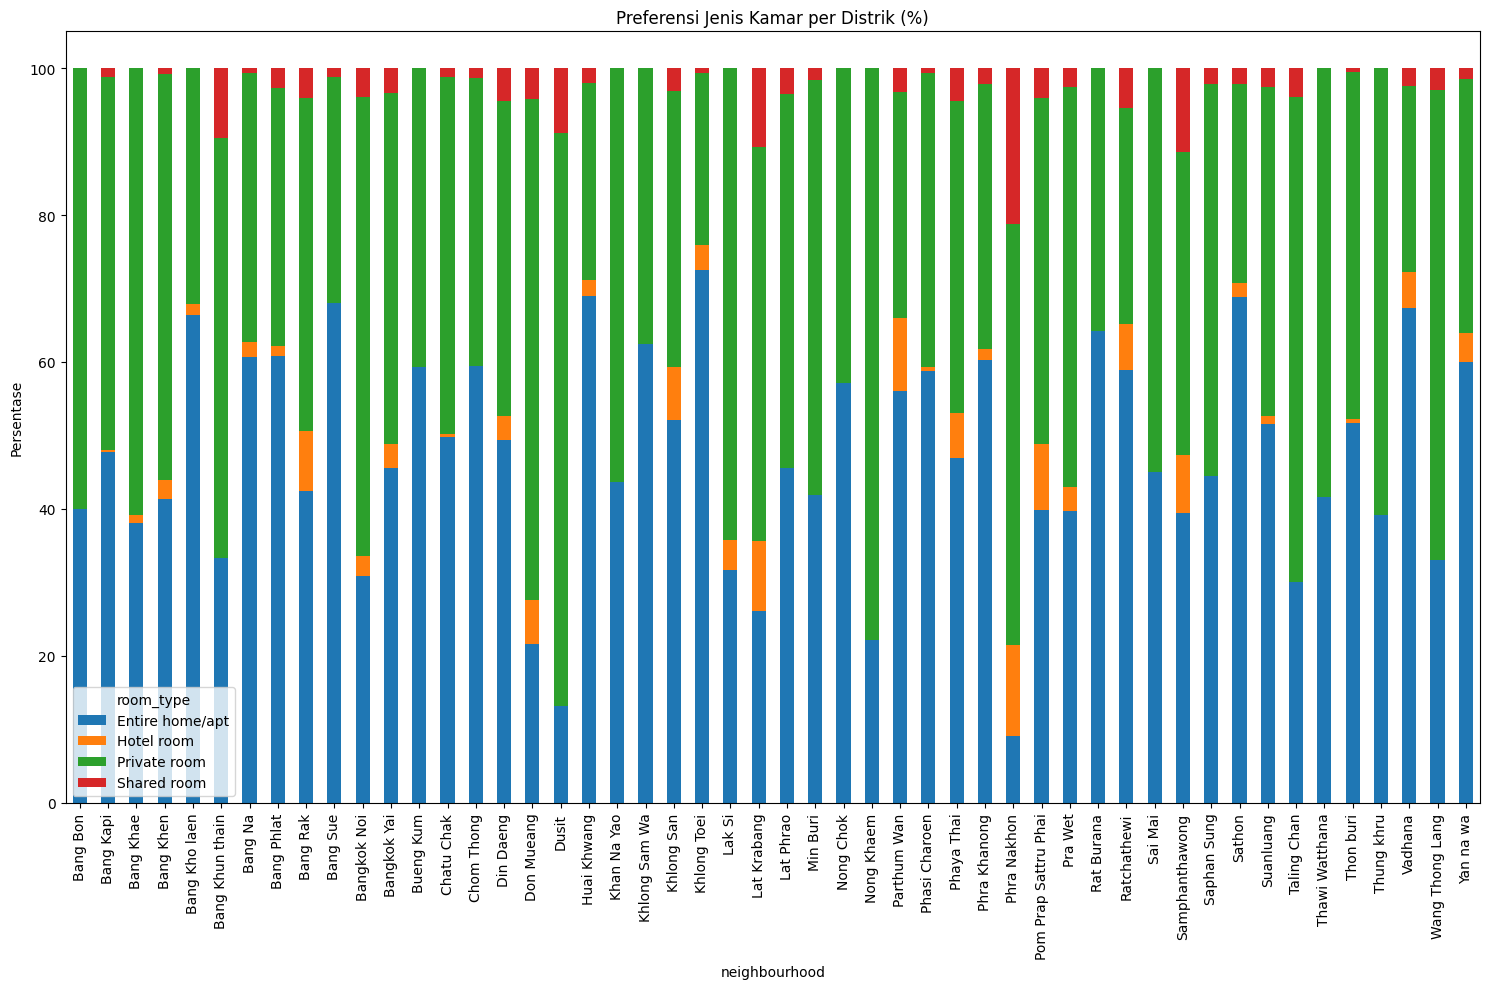

In [ ]:
print(df['room_type'].value_counts(normalize=True) * 100)

plt.figure(figsize=(7,5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title("Distribusi Jenis Kamar di Bangkok")
plt.show()

room_district = pd.crosstab(df['neighbourhood'], df['room_type'], normalize='index')*100
room_district.plot(kind='bar', stacked=True, figsize=(15,10))
plt.title("Preferensi Jenis Kamar per Distrik (%)")
plt.ylabel("Persentase")
plt.tight_layout()
plt.show()

Distribusi jenis kamar di Bangkok menunjukkan bahwa mayoritas wisatawan lebih memilih menyewa Entire home/apt, sementara Private room menjadi opsi kedua yang cukup populer. Dua tipe lainnya, yaitu Shared room dan Hotel room, jumlahnya relatif kecil dan tidak begitu diminati. Jika dilihat lebih detail per distrik, preferensi wisatawan tidak selalu sama: ada distrik yang cenderung didominasi oleh Private room, menandakan banyak warga lokal yang menyewakan kamar di rumah mereka, sedangkan distrik lain lebih banyak menawarkan Entire home/apt, biasanya di area wisata atau pusat kota. Dengan kata lain, meskipun Entire home/apt adalah tipe kamar yang paling dominan secara keseluruhan, pola distribusinya tetap bergantung pada karakteristik tiap distrik.

## Hubungan Jumlah Ulasan dengan Popularitas

Mengukur apakah jumlah ulasan dan frekuensi review per bulan memengaruhi popularitas listing.

=== Uji Normalitas (Kolmogorov-Smirnov) ===
number_of_reviews: p=0.000e+00 → Tidak Normal
reviews_per_month: p=0.000e+00 → Tidak Normal
------------------------------------------------------------
=== Hasil Uji Korelasi (Spearman) ===
r=0.892, p=0.000e+00 → Signifikan, korelasi sangat kuat positif

Interpretasi: Terdapat hubungan sangat kuat positif antara 'number_of_reviews' dan 'reviews_per_month'.


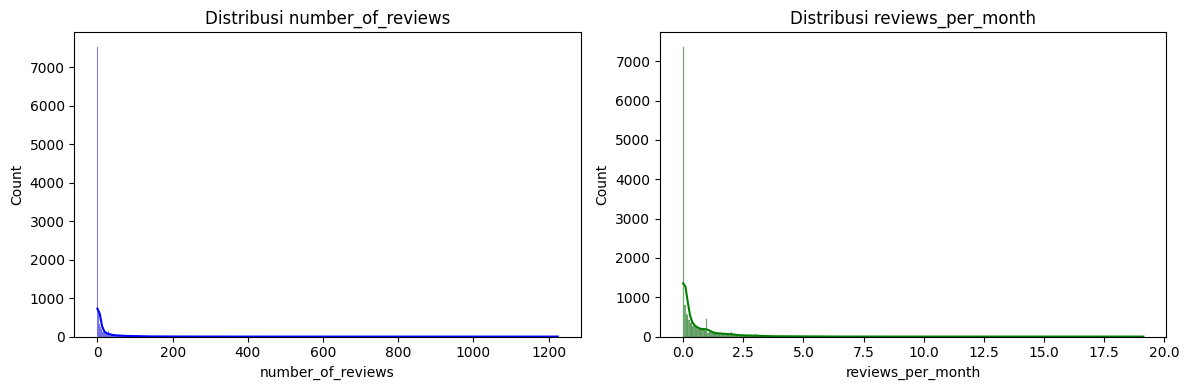

In [ ]:
def korelasi_otomatis_ks(x, y):
    x_std = (x.dropna() - x.mean()) / x.std()
    y_std = (y.dropna() - y.mean()) / y.std()

    ks_x = kstest(x_std, 'norm')
    ks_y = kstest(y_std, 'norm')

    print("=== Uji Normalitas (Kolmogorov-Smirnov) ===")
    print(f"{x.name}: p={ks_x.pvalue:.3e} → {'Normal' if ks_x.pvalue>=0.05 else 'Tidak Normal'}")
    print(f"{y.name}: p={ks_y.pvalue:.3e} → {'Normal' if ks_y.pvalue>=0.05 else 'Tidak Normal'}")
    print("-"*60)

    if ks_x.pvalue >= 0.05 and ks_y.pvalue >= 0.05:
        metode = "Pearson"
        r, pval = pearsonr(x.dropna(), y.dropna())
    else:
        metode = "Spearman"
        r, pval = spearmanr(x.dropna(), y.dropna())

    if abs(r) < 0.2:
        strength = "sangat lemah"
    elif abs(r) < 0.4:
        strength = "lemah"
    elif abs(r) < 0.6:
        strength = "sedang"
    elif abs(r) < 0.8:
        strength = "kuat"
    else:
        strength = "sangat kuat"

    arah = "positif" if r > 0 else "negatif"
    signif = "Signifikan" if pval < 0.05 else "Tidak Signifikan"

    print(f"=== Hasil Uji Korelasi ({metode}) ===")
    print(f"r={r:.3f}, p={pval:.3e} → {signif}, korelasi {strength} {arah}")

    if signif == "Signifikan":
        print(f"\nInterpretasi: Terdapat hubungan {strength} {arah} antara '{x.name}' dan '{y.name}'.")
    else:
        print(f"\nInterpretasi: Tidak terdapat hubungan yang signifikan antara '{x.name}' dan '{y.name}'.")

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(x, kde=True, ax=axes[0], color="blue")
    axes[0].set_title(f"Distribusi {x.name}")

    sns.histplot(y, kde=True, ax=axes[1], color="green")
    axes[1].set_title(f"Distribusi {y.name}")

    plt.tight_layout()
    plt.show()

korelasi_otomatis_ks(df['number_of_reviews'], df['reviews_per_month'])


Uji normalitas Kolmogorov-Smirnov menunjukkan bahwa `number_of_reviews` dan `reviews_per_month` tidak terdistribusi normal (p = 0,0), terlihat juga dari histogram yang miring ke kanan dengan beberapa nilai ekstrem.

Meski begitu, uji korelasi Spearman menunjukkan hubungan sangat kuat dan signifikan antara kedua variabel (koefisien = 0,892, p = 0,0). Artinya, listing dengan lebih banyak ulasan cenderung memiliki rata-rata ulasan per bulan yang lebih tinggi.

Secara keseluruhan, meskipun distribusi data tidak normal, terdapat hubungan positif yang sangat kuat antara jumlah ulasan total dan frekuensi ulasan per bulan, yang mengindikasikan bahwa listing dengan banyak ulasan cenderung juga memiliki aktivitas ulasan yang tinggi setiap bulannya.

## Pengaruh Ketersediaan `Availability_365`

Mengetahui bagaimana pola ketersediaan listing sepanjang tahun serta dampaknya pada harga.

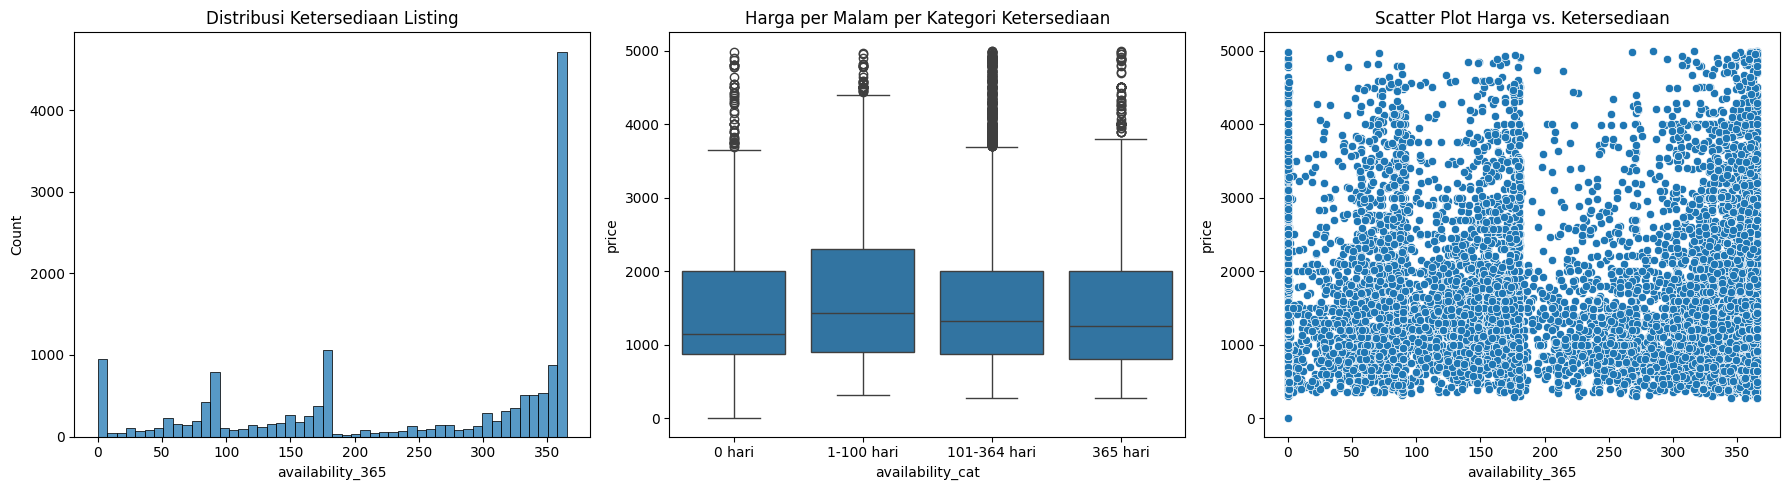


Ringkasan Harga per Kategori Ketersediaan
  availability_cat  count         mean  median           std
0           0 hari    857  2496.649942  1200.0   6226.914816
1       1-100 hari   2487  3911.515078  1500.0  35528.210403
2     101-364 hari  10118  2880.342558  1407.0  21917.244287
3         365 hari   2392  4181.691054  1414.0  27816.168594

Uji Normalitas (Kolmogorov-Smirnov) per kategori
101-364 hari: stat=0.453, p=0.000 → Tidak Normal
365 hari: stat=0.444, p=0.000 → Tidak Normal
1-100 hari: stat=0.460, p=0.000 → Tidak Normal
0 hari: stat=0.361, p=0.000 → Tidak Normal

Hasil Uji Statistik (Kruskal-Wallis)
Statistik: 17.722, p-value: 0.001


/tmp/ipython-input-3800035171.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('availability_cat')[harga_col].agg(['count','mean','median','std']).reset_index()


In [ ]:
def analisis_ketersediaan_harga_scatter(df, harga_col='price', kategori_col='availability_365', bins=[-1,0,100,364,365]):
    df['availability_cat'] = pd.cut(df[kategori_col], bins=bins,
                                    labels=['0 hari','1-100 hari','101-364 hari','365 hari'])

    fig, axes = plt.subplots(1, 3, figsize=(18,5))

    sns.histplot(df[kategori_col], bins=50, ax=axes[0])
    axes[0].set_title("Distribusi Ketersediaan Listing")

    sns.boxplot(data=df[df[harga_col] < 5000], x='availability_cat', y=harga_col, ax=axes[1])
    axes[1].set_title("Harga per Malam per Kategori Ketersediaan")

    sns.scatterplot(data=df[df[harga_col] < 5000], x=kategori_col, y=harga_col, ax=axes[2])
    axes[2].set_title("Scatter Plot Harga vs. Ketersediaan")

    plt.tight_layout()
    plt.show()

    summary = df.groupby('availability_cat')[harga_col].agg(['count','mean','median','std']).reset_index()
    print("\nRingkasan Harga per Kategori Ketersediaan")
    print(summary)

    all_normal = True
    print("\nUji Normalitas (Kolmogorov-Smirnov) per kategori")
    for cat in df['availability_cat'].unique():
        prices = df[df['availability_cat']==cat][harga_col]
        stat, p = kstest((prices - prices.mean())/prices.std(), 'norm')
        print(f"{cat}: stat={stat:.3f}, p={p:.3f} → {'Normal' if p>=0.05 else 'Tidak Normal'}")
        if p < 0.05:
            all_normal = False

    groups = [df[df['availability_cat']==cat][harga_col] for cat in df['availability_cat'].unique()]
    if all_normal:
        stat, p = f_oneway(*groups)
        test_name = "ANOVA"
    else:
        stat, p = kruskal(*groups)
        test_name = "Kruskal-Wallis"

    print(f"\nHasil Uji Statistik ({test_name})")
    print(f"Statistik: {stat:.3f}, p-value: {p:.3f}")

analisis_ketersediaan_harga_scatter(df, harga_col='price', kategori_col='availability_365')



Distribusi ketersediaan listing sepanjang tahun terlihat dari histogram, menunjukkan sebaran listing yang selalu tersedia, jarang tersedia, dan variasi lainnya.
Boxplot dan ringkasan harga menunjukkan pola harga per malam di tiap kategori ketersediaan.
Scatter plot menampilkan hubungan harga secara kontinu terhadap jumlah hari tersedia, sehingga kita bisa melihat tren harga di seluruh rentang ketersediaan.

Hasil uji statistik menunjukkan bahwa terdapat perbedaan harga per malam yang signifikan antar kategori ketersediaan listing `availability_365`. Temuan ini menandakan bahwa pola ketersediaan listing sepanjang tahun memang berpengaruh terhadap strategi penentuan harga host. Listing yang tersedia sepanjang tahun (365 hari) cenderung dipasang dengan harga yang lebih kompetitif agar dapat menarik tamu secara konsisten, sementara listing dengan ketersediaan terbatas, misalnya hanya dibuka pada periode tertentu (0–100 hari), sering kali dipatok dengan harga lebih tinggi karena bersifat lebih eksklusif atau hanya aktif pada musim ramai. Dengan demikian, tingkat ketersediaan tidak hanya mencerminkan preferensi host dalam mengelola properti, tetapi juga berkaitan langsung dengan variasi harga sewa yang ditawarkan di pasar.

## Profil Host: Individu vs Multi-listing

Membedakan performa host individu dibandingkan host dengan banyak listing (multi-host).

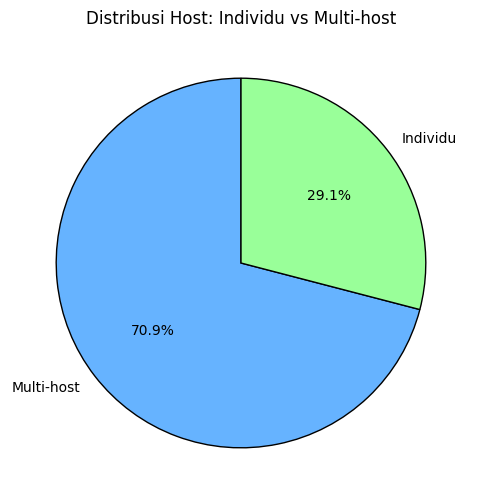

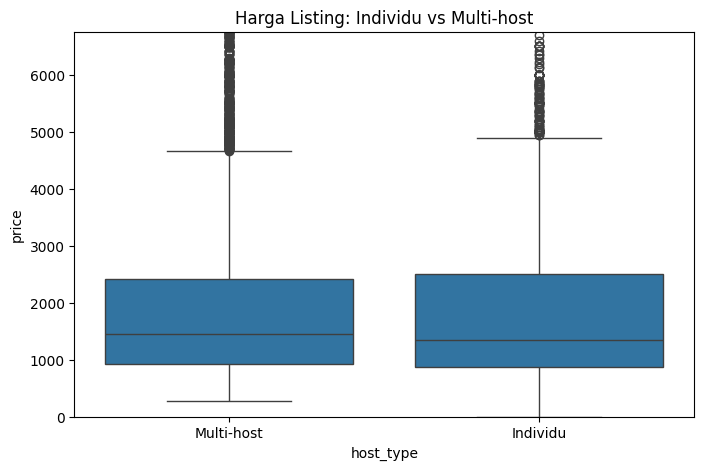

=== Uji Normalitas K-S ===
Individu: p=0.000 → Tidak Normal
Multi-host: p=0.000 → Tidak Normal

Mann-Whitney U test: stat=24953760.000, p=0.000
→ Hasil signifikan: terdapat perbedaan harga listing antara host Individu dan Multi-host.


In [ ]:
host_count = df['host_id'].value_counts()
df['host_type'] = df['host_id'].map(lambda x: 'Multi-host' if host_count[x] > 1 else 'Individu')

plt.figure(figsize=(6,6))
df['host_type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#99ff99'],
    wedgeprops={'edgecolor':'black'}
)
plt.ylabel("")
plt.title("Distribusi Host: Individu vs Multi-host")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='host_type', y='price')
plt.title("Harga Listing: Individu vs Multi-host")
plt.ylim(0, df['price'].quantile(0.95))
plt.show()

individu = df[df['host_type']=="Individu"]['price']
multi = df[df['host_type']=="Multi-host"]['price']

individu_std = (individu - individu.mean()) / individu.std()
multi_std = (multi - multi.mean()) / multi.std()

ks_ind, p_ind = kstest(individu_std.dropna(), 'norm')
ks_mul, p_mul = kstest(multi_std.dropna(), 'norm')

print("=== Uji Normalitas K-S ===")
print(f"Individu: p={p_ind:.3f} → {'Normal' if p_ind>=0.05 else 'Tidak Normal'}")
print(f"Multi-host: p={p_mul:.3f} → {'Normal' if p_mul>=0.05 else 'Tidak Normal'}")

if p_ind >= 0.05 and p_mul >= 0.05:
    stat, p = ttest_ind(individu, multi, equal_var=False)
    metode = "Independent Samples t-test"
else:
    stat, p = mannwhitneyu(individu, multi, alternative='two-sided')
    metode = "Mann-Whitney U test"

print(f"\n{metode}: stat={stat:.3f}, p={p:.3f}")
if p < 0.05:
    print("→ Hasil signifikan: terdapat perbedaan harga listing antara host Individu dan Multi-host.")
else:
    print("→ Tidak terdapat perbedaan harga yang signifikan antara host Individu dan Multi-host.")


Sekitar 70.9% host adalah multi-host, sedangkan hanya 29.1% host yang individu, sehingga pasar Airbnb di Bangkok didominasi oleh host profesional dengan banyak listing. Uji statistik menunjukkan perbedaan harga signifikan antara keduanya, di mana multi-host cenderung menerapkan strategi harga yang berbeda dibanding host individu. Hal ini menunjukkan bahwa karakteristik host berpengaruh terhadap strategi penentuan harga, di mana multi-host dengan skala operasional lebih besar cenderung memiliki pola harga berbeda dibanding host individu.

## Dampak Minimum Nights terhadap Harga & Review

Menganalisis aturan minimum menginap terhadap harga sewa dan jumlah review.


--- Ringkasan harga & review per kategori minimum nights ---
    min_n_cat  count   price_mean  price_median     price_std  reviews_mean  \
0     1 malam   8256  3204.183382        1500.0  18233.033369      0.532568   
1   2-6 malam   3348  2810.989845        1500.0  18288.110854      0.700475   
2  7-29 malam   2036  3228.762279        1364.0  36647.653573      0.442687   
3   30+ malam   2199  3764.652115        1200.0  38499.418067      0.243815   

   reviews_median  reviews_std  
0            0.04     1.071226  
1            0.32     0.985380  
2            0.21     0.663091  
3            0.03     0.465111  


/tmp/ipython-input-417284264.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('min_n_cat').agg(


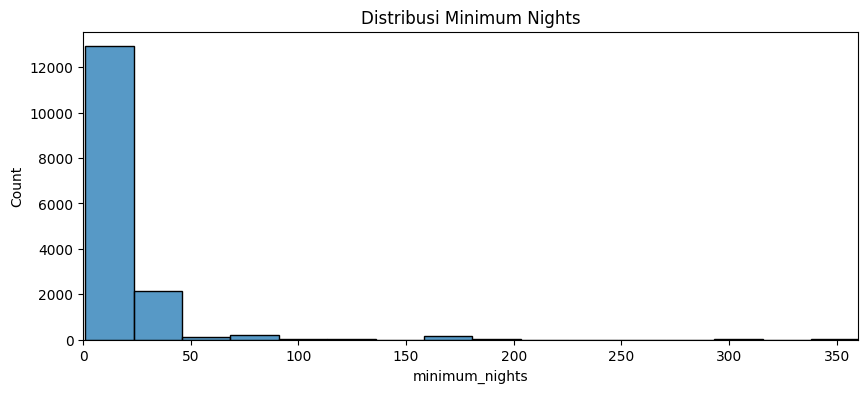

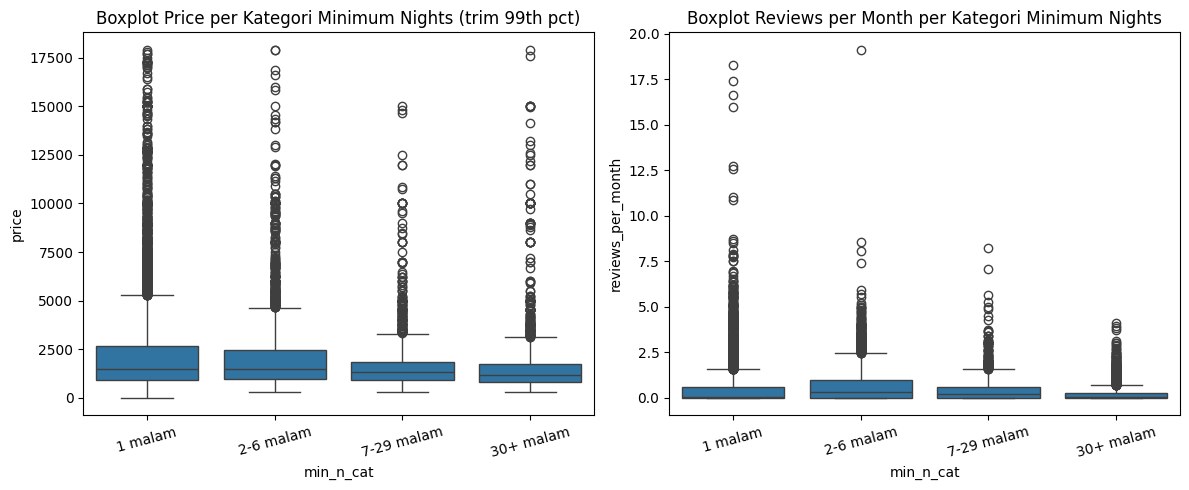

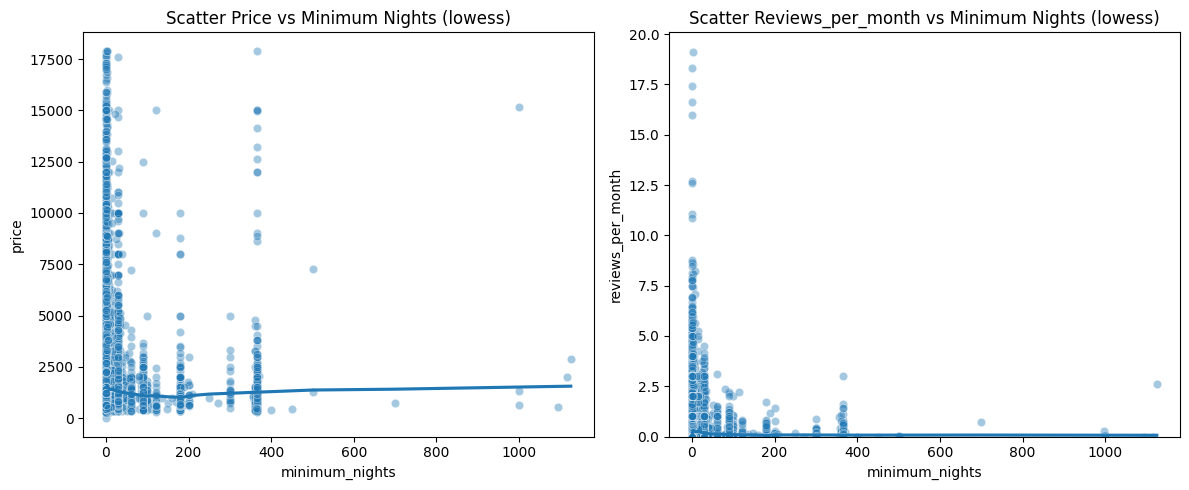


Kruskal-Wallis Test
Price across min_n_cat: stat=269.989, p=0.000
Reviews_per_month across min_n_cat: stat=546.577, p=0.000

Korelasi Spearman
minimum_nights vs price: rho=-0.105, p=1.651e-39
minimum_nights vs reviews_per_month: rho=0.019, p=1.548e-02

Ringkasan:
Terdapat perbedaan harga yang signifikan antar kategori minimum_nights (Kruskal-Wallis p < 0.05).
Terdapat perbedaan jumlah review yang signifikan antar kategori minimum_nights (Kruskal-Wallis p < 0.05).
Korelasi Spearman signifikan: negatif, sangat lemah (rho=-0.105, p=1.651e-39)
Korelasi Spearman signifikan: positif, sangat lemah (rho=0.019, p=1.548e-02)


/tmp/ipython-input-417284264.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_groups = [group['price'].dropna().values for name, group in df.groupby('min_n_cat') if len(group['price'].dropna())>0]
/tmp/ipython-input-417284264.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_groups = [group['reviews_per_month'].dropna().values for name, group in df.groupby('min_n_cat') if len(group['reviews_per_month'].dropna())>0]


In [ ]:
# Buat kategori minimum_nights yang logis
bins = [0, 1, 6, 29, 365]               # 1, 2-6, 7-29, 30+
labels = ['1 malam','2-6 malam','7-29 malam','30+ malam']
df['min_n_cat'] = pd.cut(df['minimum_nights'], bins=bins, labels=labels, include_lowest=True)

# Ringkasan deskriptif per kategori
summary = df.groupby('min_n_cat').agg(
    count=('price','count'),
    price_mean=('price','mean'),
    price_median=('price','median'),
    price_std=('price','std'),
    reviews_mean=('reviews_per_month','mean'),
    reviews_median=('reviews_per_month','median'),
    reviews_std=('reviews_per_month','std')
).reset_index()
print("\n--- Ringkasan harga & review per kategori minimum nights ---")
print(summary)

# Visualisasi
plt.figure(figsize=(10,4))
sns.histplot(df['minimum_nights'], bins=50)
plt.title("Distribusi Minimum Nights")
plt.xlim(0, np.percentile(df['minimum_nights'].replace(np.inf, np.nan).dropna(), 99))
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df[df['price'] < df['price'].quantile(0.99)], x='min_n_cat', y='price')
plt.title("Boxplot Price per Kategori Minimum Nights (trim 99th pct)")
plt.xticks(rotation=15)

plt.subplot(1,2,2)
sns.boxplot(data=df[df['reviews_per_month'].notna()], x='min_n_cat', y='reviews_per_month')
plt.title("Boxplot Reviews per Month per Kategori Minimum Nights")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df[df['price'] < df['price'].quantile(0.99)], x='minimum_nights', y='price', alpha=0.4)
sns.regplot(data=df[df['price'] < df['price'].quantile(0.99)], x='minimum_nights', y='price', scatter=False, lowess=True)
plt.title("Scatter Price vs Minimum Nights (lowess)")

plt.subplot(1,2,2)
sns.scatterplot(data=df[df['reviews_per_month'].notna()], x='minimum_nights', y='reviews_per_month', alpha=0.4)
sns.regplot(data=df[df['reviews_per_month'].notna()], x='minimum_nights', y='reviews_per_month', scatter=False, lowess=True)
plt.title("Scatter Reviews_per_month vs Minimum Nights (lowess)")
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# Uji statistik antar kategori (Kruskal-Wallis) untuk price & reviews_per_month
price_groups = [group['price'].dropna().values for name, group in df.groupby('min_n_cat') if len(group['price'].dropna())>0]
reviews_groups = [group['reviews_per_month'].dropna().values for name, group in df.groupby('min_n_cat') if len(group['reviews_per_month'].dropna())>0]

kw_price_stat, kw_price_p = kruskal(*price_groups)
kw_rev_stat, kw_rev_p = kruskal(*reviews_groups)

print("\nKruskal-Wallis Test")
print(f"Price across min_n_cat: stat={kw_price_stat:.3f}, p={kw_price_p:.3f}")
print(f"Reviews_per_month across min_n_cat: stat={kw_rev_stat:.3f}, p={kw_rev_p:.3f}")

# Korelasi Spearman (minimum_nights) vs price & reviews_per_month
mask_price = df['price'].notna() & df['minimum_nights'].notna() & (df['price'] < df['price'].quantile(0.99))
mask_rev = df['reviews_per_month'].notna() & df['minimum_nights'].notna()

rho_price, p_price = spearmanr(df.loc[mask_price, 'minimum_nights'], df.loc[mask_price, 'price'])
rho_rev, p_rev = spearmanr(df.loc[mask_rev, 'minimum_nights'], df.loc[mask_rev, 'reviews_per_month'])

print("\nKorelasi Spearman")
print(f"minimum_nights vs price: rho={rho_price:.3f}, p={p_price:.3e}")
print(f"minimum_nights vs reviews_per_month: rho={rho_rev:.3f}, p={p_rev:.3e}")

# Ringkasan
print("\nRingkasan:")
if kw_price_p < 0.05:
    print("Terdapat perbedaan harga yang signifikan antar kategori minimum_nights (Kruskal-Wallis p < 0.05).")
else:
    print("Tidak terdapat perbedaan harga yang signifikan antar kategori minimum_nights (Kruskal-Wallis p >= 0.05).")

if kw_rev_p < 0.05:
    print("Terdapat perbedaan jumlah review yang signifikan antar kategori minimum_nights (Kruskal-Wallis p < 0.05).")
else:
    print("Tidak terdapat perbedaan jumlah review yang signifikan antar kategori minimum_nights (Kruskal-Wallis p >= 0.05).")

# interpretasi korelasi
def interpret_corr(rho, p):
    if p < 0.05:
        direction = "positif" if rho > 0 else "negatif"
        strength = abs(rho)
        if strength < 0.2:
            s = "sangat lemah"
        elif strength < 0.4:
            s = "lemah"
        elif strength < 0.6:
            s = "sedang"
        elif strength < 0.8:
            s = "kuat"
        else:
            s = "sangat kuat"
        print(f"Korelasi Spearman signifikan: {direction}, {s} (rho={rho:.3f}, p={p:.3e})")
    else:
        print(f"Tidak ada korelasi Spearman yang signifikan (rho={rho:.3f}, p={p:.3e})")

interpret_corr(rho_price, p_price)
interpret_corr(rho_rev, p_rev)


Hasil analisis menunjukkan bahwa aturan minimum nights berpengaruh terhadap harga sewa maupun jumlah review yang diterima suatu listing. Listing dengan aturan minimum menginap sangat rendah (1–2 malam) cenderung memiliki harga per malam yang lebih kompetitif serta jumlah review yang lebih tinggi. Hal ini logis karena wisatawan umumnya lebih menyukai fleksibilitas menginap singkat, sehingga listing tersebut lebih sering dipesan dan berpotensi mendapat lebih banyak ulasan. Sebaliknya, listing dengan aturan minimum menginap yang tinggi (misalnya ≥30 malam) justru memiliki harga yang relatif bervariasi, namun rata-rata jumlah reviewnya lebih rendah. Pola ini mengindikasikan bahwa semakin ketat aturan minimum nights, semakin terbatas pula peluang listing untuk menarik tamu dan mendapatkan review, meskipun sebagian host dapat mengimbangi dengan strategi harga.

# Kesimpulan dan Rekomendasi

---

# Kesimpulan

1. **Pola harga** Airbnb di Bangkok cukup bervariasi, namun mayoritas listing terkonsentrasi pada rentang harga menengah. Listing dengan harga terlalu tinggi cenderung kurang diminati, sementara harga yang kompetitif sesuai standar distrik lebih menarik wisatawan.  
2. **Jenis kamar** paling populer adalah *Entire home/apt*, menunjukkan preferensi wisatawan terhadap kenyamanan dan privasi. Private room tetap relevan untuk segmen budget traveler, tetapi shared room kurang diminati.  
3. **Jumlah ulasan** berkorelasi positif dengan popularitas; listing dengan ulasan lebih banyak cenderung memiliki tingkat okupansi lebih tinggi.  
4. **Availability** yang tinggi (tersedia sepanjang tahun) meningkatkan peluang pemesanan, tetapi perlu diimbangi dengan strategi harga yang fleksibel.  
5. Pasar Airbnb di Bangkok cukup didominasi oleh **multi-host**, yang memiliki lebih dari satu listing. Multi-host cenderung lebih profesional, meskipun host individu masih memiliki peluang jika mampu mengoptimalkan kualitas listing.  
6. **Minimum nights** yang terlalu tinggi dapat menurunkan daya tarik listing, terutama bagi wisatawan yang mencari fleksibilitas menginap singkat.  

# Rekomendasi

1. **Optimasi harga dinamis**: Host sebaiknya menyesuaikan harga berdasarkan lokasi, musim, dan tren kompetitor agar tetap kompetitif.  
2. **Fokus pada kenyamanan & privasi**: Karena *Entire home/apt* lebih diminati, host dengan private room bisa meningkatkan daya tarik melalui fasilitas tambahan atau layanan ekstra.  
3. **Dorong ulasan positif**: Host sebaiknya mendorong tamu untuk meninggalkan ulasan, karena review berperan penting dalam meningkatkan visibilitas dan kepercayaan calon tamu.  
4. **Manfaatkan ketersediaan**: Listing yang selalu tersedia berpotensi lebih sering dipesan; host bisa memanfaatkan strategi *calendar management* untuk menyeimbangkan tingkat okupansi dan harga.  
5. **Strategi host individu**: Untuk bersaing dengan multi-host, host individu bisa menonjolkan keunikan, personal touch, dan layanan yang lebih ramah dibandingkan gaya manajemen “korporasi”.  
6. **Fleksibilitas minimum nights**: Disarankan untuk tidak menetapkan minimum stay terlalu tinggi agar tetap menarik bagi short-stay traveler.  
